#**IMPORTING LIBRARIES**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
from tqdm import tqdm_notebook as tqdm

from gensim.models import *

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import *
import keras.backend as K
from keras.utils import np_utils

from keras.callbacks import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import regularizers
from numpy import array
from numpy import asarray
from numpy import zeros


In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
pip install simpletransformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 2

In [4]:


from simpletransformers.classification import ClassificationModel
import pandas as pd



In [5]:


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)



#**LOADING DATASET**

In [6]:
import pandas as pd
df=pd.read_csv('/content/manglish_dataset.csv')
df

,comments,status,rating
0,'Super ️️ waiting for upcoming bharanam’,positive,4
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
2,Make in Kerala,positive,3
3,Hats off Hibi Eden for promoting menstrual cup...,positive,4
4,Parasyathiny aano 10 crores,negative,1
...,...,...,...
1092,മാർഗം ഒന്നേയുള്ളുലണ്ടൻ വരെ പോയി ദുബായ് വഴി വന്...,positive,2
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,5
1094,കൂട്ട ആത്മഹത്യ ചെയ്യാതെ കുടുംബം വേണമെങ്കിൽ മാർ...,negative,4
1095,Good debate 👍👍👌👍,negative,2


#EDA

In [7]:
# getting the shape of the data
df.shape

(1097, 3)

In [8]:
df.tail(10)

,comments,status,rating
1087,എന്താ ശരിയല്ലേ താങ്കള്‍ ഈ കേരളത്തില്‍ തന്നെ അല...,negative,0
1088,Cpm um bj pum തമ്മിലുള്ള ഒത്തു കളി.. ഭരണം മാറാ...,negative,5
1089,Cpm um bj pum തമ്മിലുള്ള ഒത്തു കളി.. ഭരണം മാറാ...,neutral,2
1090,സി പി എമ്മും UDF ഉം KJP യും എല്ലാം ഒന്നു തന്നെ...,negative,0
1091,അടുത്ത ഓണം വരെ ഭരണം ഉണ്ടായാൽ ഒരു കാലി കിറ്റ് അ...,neutral,1
1092,മാർഗം ഒന്നേയുള്ളുലണ്ടൻ വരെ പോയി ദുബായ് വഴി വന്...,positive,2
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,5
1094,കൂട്ട ആത്മഹത്യ ചെയ്യാതെ കുടുംബം വേണമെങ്കിൽ മാർ...,negative,4
1095,Good debate 👍👍👌👍,negative,2
1096,എണ്ണ വില കുറക്കും എന്ന് പറഞ്ഞിട്ട് ഒറ്റയടിക്ക്...,negative,4


In [9]:
df.head()

,comments,status,rating
0,'Super ️️ waiting for upcoming bharanam’,positive,4
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
2,Make in Kerala,positive,3
3,Hats off Hibi Eden for promoting menstrual cup...,positive,4
4,Parasyathiny aano 10 crores,negative,1


In [10]:
# describing the data set
df.describe()

,rating
count,1097.000000
mean,2.423883
std,1.687193
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1093 non-null   object
 1   status    1097 non-null   object
 2   rating    1097 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.8+ KB


In [12]:
# checking if there is any null data or not
df.isnull().any()

comments     True
status      False
rating      False
dtype: bool

In [13]:
for i in df.columns:
  print(i,df[i].unique()) 

comments ["'Super ️️ waiting for upcoming bharanam’"
 "'India maharajyathil keralam mathram alla, bt ithrem kattumudipikana vere oru nethakanmar indavilla’"
 'Make in Kerala'
 'Hats off Hibi Eden for promoting menstrual cup throughout the State.'
 'Parasyathiny aano 10 crores' 'ഇമ്മാതിരി കിഴങ്ങ് മന്ത്രി'
 'Cyber security oke enthinanu cheyunathu ?'
 'Sarkkaar Udyogastharude Salariyude 20% Coupons aayi nalkuka.'
 "Kerala budget will be beneficial for Bengali youth because malayali youths don't want to stay in Kerala."
 'ldf vanu ellam sheriyay'
 'ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ടായിട്ടില്ല'
 'Kerala should be made a hub of Vazhakkula Doctorate.'
 'India may be utilised by the help of Adani for our future lives and namaste to all of us and to Sri Adani.'
 'K budget adipoli'
 'During election people of kerala saw your performance.'
 'State funds totally mismanaged and misused by government.'
 'Central budget nalla budget anu moyanth anchore....'
 'GST നല്ലത് തന്നെയാണ്' 'Petro

In [14]:
df.columns

Index(['comments', 'status', 'rating'], dtype='object')

#**DATA VISUALIZATION**

<Axes: xlabel='rating', ylabel='count'>

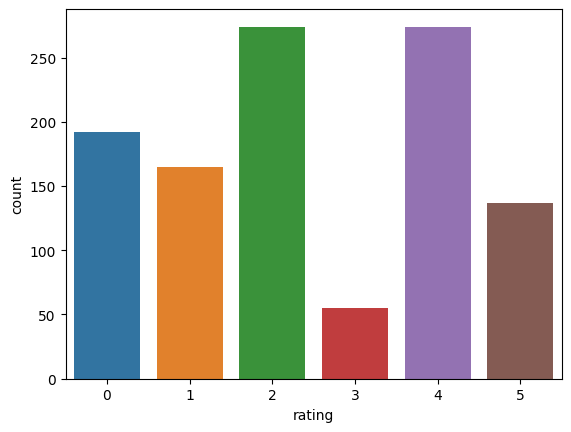

In [15]:
import seaborn as sns
sns.countplot(x='rating',data=df)

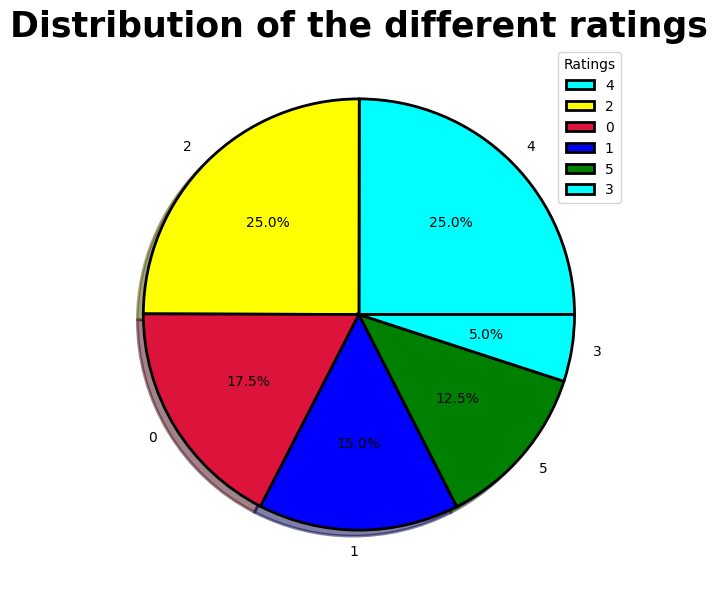

In [16]:
fig=plt.figure(figsize=(7,7))
colors=("cyan","yellow","crimson","blue","green")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0)
tags=df['rating'].value_counts()
tags.plot(kind='pie',autopct="%1.1f%%",label='',colors=colors,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the different ratings',fontsize='25',fontweight='bold')
plt.show()

In [17]:
df['status'].value_counts()

negative    562
positive    338
neutral     197
Name: status, dtype: int64

Text(0, 0.5, 'Status')

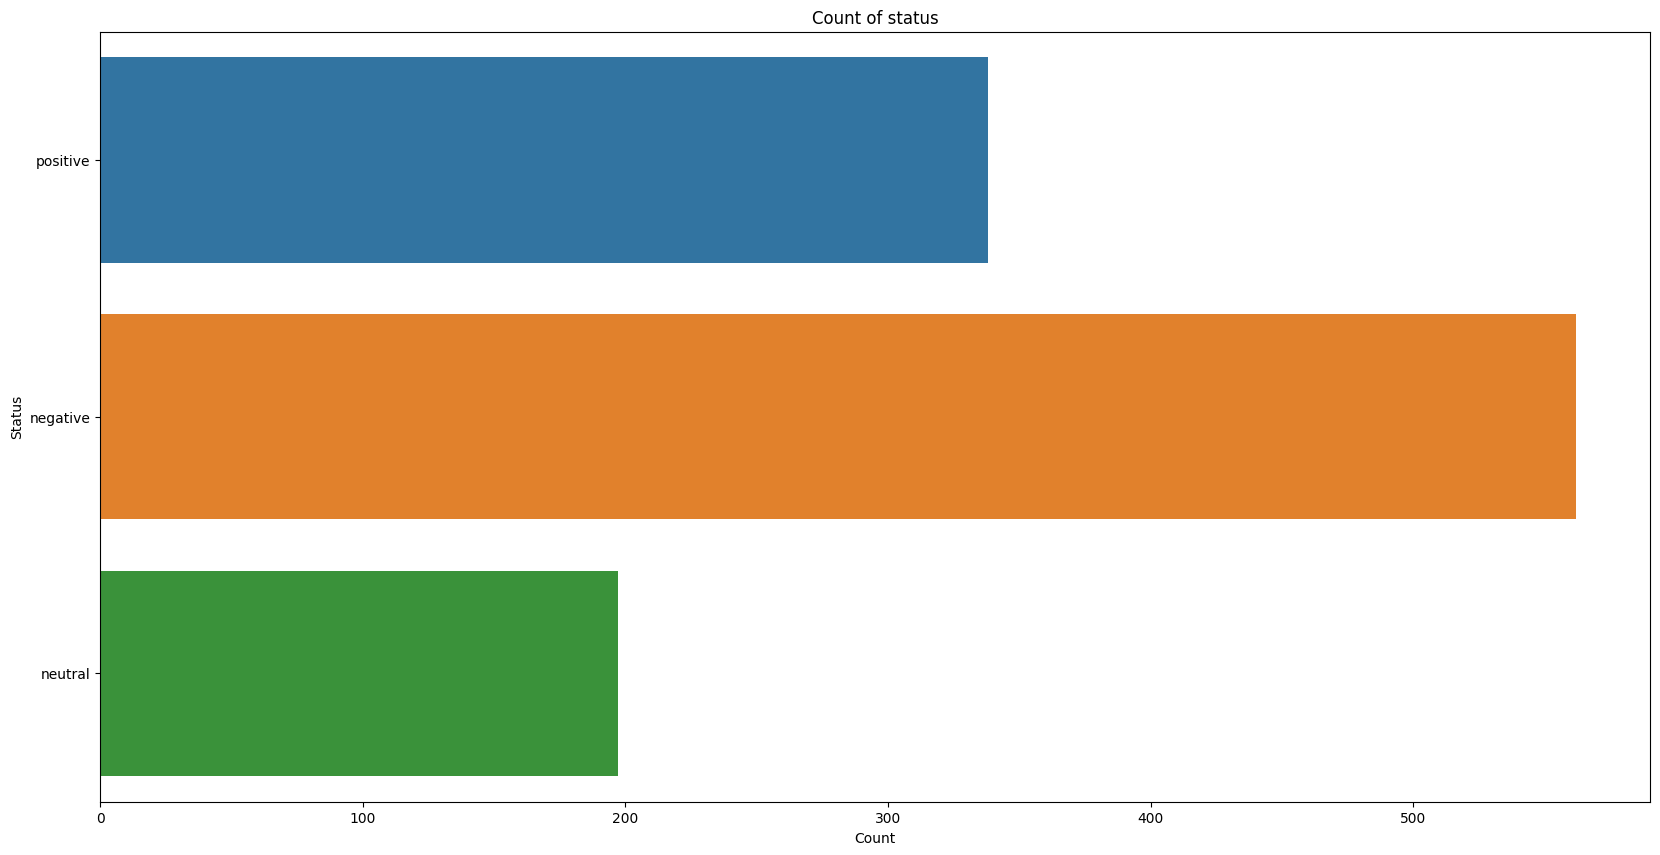

In [18]:
fig=plt.figure(figsize=(20,10)) 
sns.countplot(y='status',data=df)
plt.title("Count of status")
plt.xlabel("Count")
plt.ylabel("Status")

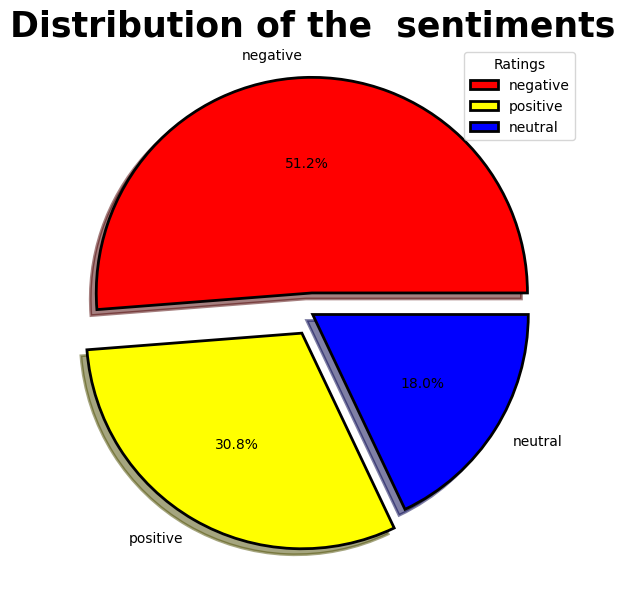

In [19]:
fig=plt.figure(figsize=(7,7))
colors=("red","yellow",'blue')
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0)
tags=df['status'].value_counts()
tags.plot(kind='pie',autopct="%0.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the  sentiments',fontsize='25',fontweight='bold')
plt.show()

In [20]:


pos_sentiment= df[df.status=='negative']
pos_sentiment.head()

,comments,status,rating
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
4,Parasyathiny aano 10 crores,negative,1
5,ഇമ്മാതിരി കിഴങ്ങ് മന്ത്രി,negative,1
10,ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ട...,negative,0
11,Kerala should be made a hub of Vazhakkula Doct...,negative,1


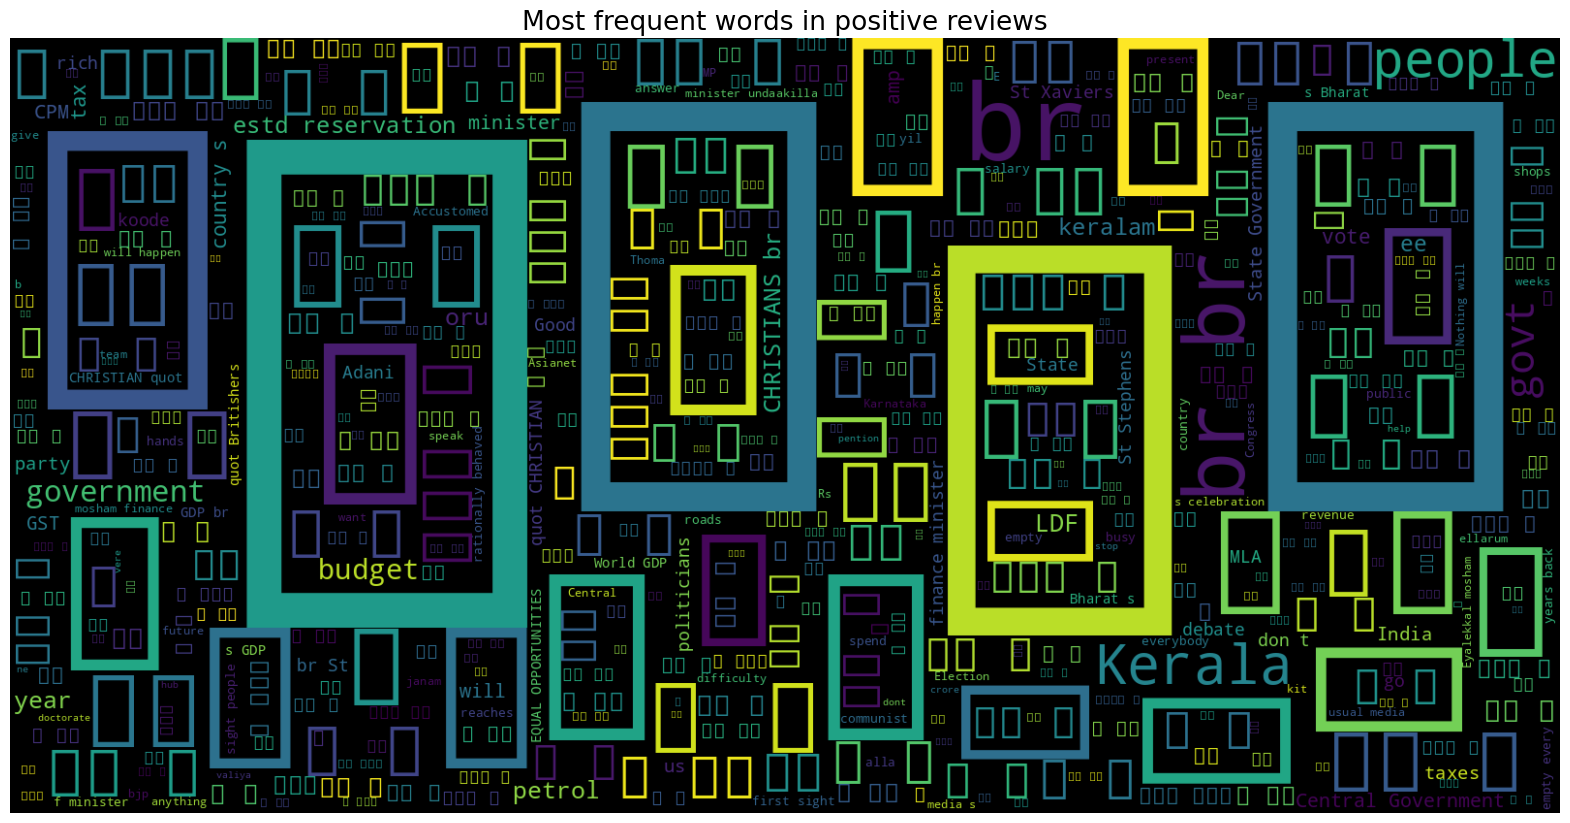

In [21]:
from wordcloud import WordCloud

text = ' '.join([word for word in pos_sentiment['comments']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()



In [22]:
df.drop('rating',axis=1,inplace=True)



In [23]:
df.isnull().sum()

comments    4
status      0
dtype: int64

In [24]:
df['comments']=df['comments'].fillna('ldf vanu ellam sheriyaki')

#Translate & Transliterating the dataset

In [25]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15721 sha256=9d17c5fa81c8d051149ef682c121b1a3d31a73b092c3db3d8f7123501ee1107c
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
 

In [26]:
!pip install mtranslate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3671 sha256=a218ba85bb58b58ed0cb3f18f6de4240b929c6fde3ad2670cd8387dc65cf3854
  Stored in directory: /root/.cache/pip/wheels/c2/04/15/d7654c2c4a9a52e09922967593f3278fed66059be65ca671ea
Successfully built mtranslate


In [27]:
pip install  indic_transliteration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.8 MB/s eta 0:00:00


In [28]:
import pandas as pd
from mtranslate import translate
from indic_transliteration import sanscript



# Function to translate and transliterate a single text
def translate_transliterate(text):
    # Translate the text from Malayalam to English
    translated_text = translate(text, 'en', 'ml')

    # Transliterate the translated text to English characters
    transliterated_text = sanscript.transliterate(translated_text, sanscript.MALAYALAM, sanscript.ITRANS)

    return transliterated_text

# Apply translation and transliteration to the 'comments' column
df['comments'] = df['comments'].fillna('ldf vanu ellam sheriyaki')
df['comments'] = df['comments'].apply(lambda x: translate_transliterate(x) if pd.notnull(x) else x)



print(df)









                                               comments    status
0              'Super ️️ waiting for upcoming bharanam'  positive
1     'India maharajyathil keralam mathram alla, bt ...  negative
2                                        Make in Kerala  positive
3     Hats off Hibi Eden for promoting menstrual cup...  positive
4                           Parasyathiny aano 10 crores  negative
...                                                 ...       ...
1092  The only way is to go to London and come via D...  positive
1093  E-rashtriya netakkalude swathukal kanduketi, a...  negative
1094  If you want a family without committing mass s...  negative
1095                                   Good debate 👍👍👌👍  negative
1096  They said that the price of oil will be reduce...  negative

[1097 rows x 2 columns]


#Data Cleaning

##Emoji & emoticons replacing

In [29]:
#find emoticons in a dataset
def check_smileys(text):
  smiley_regex = r"(?:X|:|;|=)(?:-)?(?:\)|\(|O|D|P)"
  return len(re.findall(smiley_regex, text)) > 0

# Add a new column to the dataset indicating if there are Emoticons in the review
df["has_smileys"] = df["comments"].apply(check_smileys)

# Print the first 5 rows of the updated dataset
smiley_reviews = df[df['has_smileys'] == True]
print(smiley_reviews.head())

                                              comments    status  has_smileys
381  This story came to mind when I thought about t...  positive         True
932  Finance Minister's &#39;Financial Expertise&#3...  positive         True


In [30]:
#finding the emoji's Smilies by importing counter
from collections import Counter
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def extract_emojis(text):
    return re.findall(emoji_pattern, text)

emojis = []
for text in df['comments']:
    emojis += extract_emojis(text)

emoji_frequency = Counter(emojis)

print(emoji_frequency)

Counter({'😂': 11, '😡': 6, '🏻': 6, '🙏': 6, '😜😜😜': 6, '😂😂😂😂': 5, '😉😉😜': 5, '😄': 4, '🙄': 4, '😂😂': 4, '😀': 3, '👏': 3, '😁': 3, '😅': 3, '😂😂😂': 3, '😭': 3, '😌': 2, '😜': 2, '😁😁😁': 2, '👌': 2, '♥️♥️': 2, '😏😏😏': 2, '🙏👍': 2, '🙈': 2, '😂😂😂😂😂': 2, '🙏🙏🙏🙏': 2, '😡😡': 2, '👍👍👌👍': 2, '😄😄😄': 2, '⚖️': 2, '😆😆😆': 2, '😳': 2, '️️': 1, '🌹': 1, '😘': 1, '😍': 1, '❣️🙏': 1, '👹👹👹👹👹👹👹👹👹👹👹': 1, '👍': 1, '😜😛😍😆😁😀': 1, '😝😃😄': 1, '❤❤❤': 1, '😭😭😝': 1, '😔☹': 1, '😂😂😂😂😂😂😂': 1, '👍👍👍👍👍': 1, '❓': 1, '😀😀😀': 1, '☺️❤️😍': 1, '♥️': 1, '😃': 1, '✍': 1, '😐': 1, '👍🏻👌': 1, '😀😁': 1, '😊': 1, '💪': 1, '😜😜😜😜😜': 1, '😍😍': 1, '🙏🙏💪💪': 1, '💥💥💥': 1, '🏻👍': 1, '👏👏👏': 1, '😂😢😅': 1, '😄😄😄😄😄': 1, '👍🏻': 1, '😤😤😤': 1, '👍🙏🙏': 1, '😎': 1, '😔😔': 1, '😈😈😈😈': 1, '💪💪💪': 1, '😡😡😡😡😡😡😡😡': 1, '😢👏': 1, '😔': 1, '👍🙏': 1, '😢😅😅😅': 1, '😢': 1, '❤❤': 1, '🙄🙄🙄': 1, '😭😭😭😭😭': 1, '😂😂😂😂😂😂😂😂': 1, '😱😪': 1, '😄😄😄😄': 1, '🎁': 1, '✨️': 1, '💖': 1, '😝😝😝😝😝': 1, '😁😁': 1, '❣️': 1, '☺️': 1, '💯': 1})


In [31]:
# import emoji 
UNICODE_EMOJI = {'😂':'smiling with tears','😡':'angry mood','🏻':'why','🙏':'thanking','😜':'winking face', '😂':'smiling with tears','😉':'winking face','😄':'shaming','🙄':'thinking',
                 '😀':'just smiling','👏':'clapping','😁':'grinning face with smiling eyes','😅':'smiling face with open mouth','😭':'crying','😌':'shaming face','😜':'face with stuckout tongue',
                 '👌':'super','♥️':'red love','😏':'smirking face','👍':'ok','😳':'flushed face','🌹':'red rose','😘':'kisses',
                 '😍':'smiling face with loving eyes','❣️':'love','👹':'japanese ogre', '❓':'questioning','✍':'writing','💪':'showing muscles','💥':'blasting bomb',
                 '😤':'face with look of triumph','😎':'relaxed','😱':'wow','🎁':'gift','💖':'love', '💯':'hundred percentage','✨️':'sparkles'}
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, ' '+"_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split())+' ')
    return text

# Function for converting emoticons into word
EMOTICONS_EMO = {':)':'Happy or smiling face', ':-)':'Happy or smiling face',';)':'Winking face',';-)':'Winking face', ':(':'Sad face', ':-(':'Sad face', ':-D':'Grinning face with a big smile', ':D':'Grinning face with a big smile'}
def convert_emoticons(text):
    for i,v in EMOTICONS_EMO.items():
        if i in text:
            text = text.replace(i,"_".join(v.replace(",","").split()))
            break
    return text

In [32]:
df["cleaned_comments"]=df["comments"].apply(convert_emojis)
df["cleaned_comments"]=df["comments"].apply(convert_emoticons)

In [33]:
#check if all emoticons are replaced
df[df['has_smileys'] == True]
print('All Emoticons are Replaced')

All Emoticons are Replaced


**Stemming and cleaning using ReGex**

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

#model building and splitting
import nltk
nltk.download('stopwords')
corpus = []
for i in range(0, 1097):
    review = re.sub('[^a-zA-Z]', ' ', df['cleaned_comments'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus
df['cleaned_comments']=corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
df

,comments,status,has_smileys,cleaned_comments
0,'Super ️️ waiting for upcoming bharanam',positive,False,super wait upcom bharanam
1,"'India maharajyathil keralam mathram alla, bt ...",negative,False,india maharajyathil keralam mathram alla bt it...
2,Make in Kerala,positive,False,make kerala
3,Hats off Hibi Eden for promoting menstrual cup...,positive,False,hat hibi eden promot menstrual cup throughout ...
4,Parasyathiny aano 10 crores,negative,False,parasyathini aano crore
...,...,...,...,...
1092,The only way is to go to London and come via D...,positive,False,way go london come via dubai
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,False,e rashtriya netakkalud swathuk kanduketi avark...
1094,If you want a family without committing mass s...,negative,False,want famili without commit mass suicid leav ke...
1095,Good debate 👍👍👌👍,negative,False,good debat


In [36]:
df=df.drop(['comments','has_smileys'],axis=1)

In [37]:
df

,status,cleaned_comments
0,positive,super wait upcom bharanam
1,negative,india maharajyathil keralam mathram alla bt it...
2,positive,make kerala
3,positive,hat hibi eden promot menstrual cup throughout ...
4,negative,parasyathini aano crore
...,...,...
1092,positive,way go london come via dubai
1093,negative,e rashtriya netakkalud swathuk kanduketi avark...
1094,negative,want famili without commit mass suicid leav ke...
1095,negative,good debat


#**TfidfVectorization**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2500)

#**Data Splitting**

In [39]:
x = tfidf.fit_transform(corpus).toarray()
#The resulting x matrix will contain the count of each word in the corpus data, and the y array will contain the target values.
tfidf.vocabulary_

{'super': 2060,
 'wait': 2411,
 'upcom': 2263,
 'bharanam': 324,
 'india': 987,
 'maharajyathil': 1281,
 'keralam': 1095,
 'mathram': 1353,
 'alla': 97,
 'bt': 394,
 'vere': 2360,
 'oru': 1511,
 'make': 1286,
 'kerala': 1094,
 'promot': 1653,
 'menstrual': 1374,
 'throughout': 2154,
 'state': 2009,
 'aano': 17,
 'crore': 628,
 'potato': 1592,
 'minist': 1384,
 'secur': 1879,
 'cheyunathu': 500,
 'sarkkaar': 1852,
 'udyogastharud': 2219,
 'salariyud': 1823,
 'aayi': 23,
 'budget': 398,
 'benefici': 312,
 'bengali': 315,
 'youth': 2493,
 'malayali': 1293,
 'want': 2413,
 'stay': 2014,
 'ldf': 1196,
 'vanu': 2307,
 'ellam': 700,
 'sheriyay': 1917,
 'never': 1453,
 'power': 1607,
 'govern': 911,
 'world': 2462,
 'made': 1274,
 'hub': 962,
 'vazhakkula': 2335,
 'doctor': 665,
 'may': 1359,
 'util': 2277,
 'help': 937,
 'adani': 45,
 'futur': 881,
 'live': 1231,
 'namast': 1432,
 'us': 2270,
 'sri': 1993,
 'adipoli': 56,
 'elect': 695,
 'peopl': 1546,
 'saw': 1861,
 'perform': 1549,
 'fund':

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['status']=le.fit_transform(df['status'])

In [41]:
from tqdm import tqdm, trange
import numpy as np


# Importing specific libraries for data prerpcessing, model archtecture choice, training and evaluation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from transformers import AdamW

In [42]:
# Defining constants
epochs = 10
MAX_LEN = 128
batch_size = 8
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#Spliting Training and validation data


In [43]:
# Initialize CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base',do_lower_case=True)

In [44]:

# Creates list of texts and labels
text = df['cleaned_comments'].to_list()
print(df.status.unique())
labels = df['status'].to_list()


#user tokenizer to convert sentences into tokenizer
input_ids  = [tokenizer.encode(sent,add_special_tokens=True,max_length=MAX_LEN) for sent in text]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]  
    attention_masks.append(seq_mask)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2 0 1]


In [45]:
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=42, test_size=0.1)

# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)

validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

#CamemBERT model

In [46]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=3)
model.to(device)

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 

CamembertForSequenceClassification(
  (roberta): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0-11): 12 x CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=Tru

#Defining the parameters and metrics to optimize

In [47]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, eps=10e-8)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#Training and evaluating our model

In [48]:
# Store our loss and accuracy for plotting if we want to visualize training evolution per epochs after the training process
train_loss_set = []

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):  
    # Tracking variables for training
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the model
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        outputs = model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        # Get loss value
        loss = outputs[0]
        # Add it to train loss list
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
    
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    


    # Tracking variables for validation
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Validation of the model
    model.eval()
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to device CPU or GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs =  model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss, logits = outputs[:2]
    
        # Move logits and labels to CPU if GPU is used
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 1.025213479515045


Epoch:  10%|█         | 1/10 [00:27<04:04, 27.17s/it]

Validation Accuracy: 0.48214285714285715
Train loss: 1.013334834767926


Epoch:  20%|██        | 2/10 [00:48<03:12, 24.01s/it]

Validation Accuracy: 0.48214285714285715
Train loss: 1.0088779195662467


Epoch:  30%|███       | 3/10 [01:11<02:42, 23.21s/it]

Validation Accuracy: 0.49107142857142855
Train loss: 0.994435596369928


Epoch:  40%|████      | 4/10 [01:33<02:18, 23.01s/it]

Validation Accuracy: 0.5267857142857143
Train loss: 0.9700930325254318


Epoch:  50%|█████     | 5/10 [01:57<01:55, 23.11s/it]

Validation Accuracy: 0.4970238095238095
Train loss: 0.8988915667418511


Epoch:  60%|██████    | 6/10 [02:20<01:33, 23.27s/it]

Validation Accuracy: 0.5059523809523809
Train loss: 0.793466322604687


Epoch:  70%|███████   | 7/10 [02:43<01:09, 23.21s/it]

Validation Accuracy: 0.4613095238095238
Train loss: 0.6354328011793475


Epoch:  80%|████████  | 8/10 [03:06<00:46, 23.15s/it]

Validation Accuracy: 0.3988095238095238
Train loss: 0.5841605519094775


Epoch:  90%|█████████ | 9/10 [03:30<00:23, 23.19s/it]

Validation Accuracy: 0.44345238095238093
Train loss: 0.49177330588140794


Epoch: 100%|██████████| 10/10 [03:53<00:00, 23.34s/it]

Validation Accuracy: 0.47916666666666663


#Test the model on an unseen texts

In [56]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from mtranslate import translate
from indic_transliteration import sanscript

def preprocess_text(text):
    # Translate the text from Malayalam to English
    translated_text = translate(text, 'en', 'ml')

    # Transliterate the translated text to English characters
    transliterated_text = sanscript.transliterate(translated_text, sanscript.MALAYALAM, sanscript.ITRANS)

    # Remove non-alphabetic characters
    transliterated_text = re.sub('[^a-zA-Z]', ' ', transliterated_text)

    # Convert to lowercase
    transliterated_text = transliterated_text.lower()

    # Tokenize the text
    words = transliterated_text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the preprocessed words
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Preprocess the external text
external_text = "ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ടായിട്ടില്ല"
preprocessed_text = preprocess_text(external_text)

print(preprocessed_text)

# Encode the comments
tokenized_comments_ids = [tokenizer.encode(comment,add_special_tokens=True,max_length=MAX_LEN) for comment in preprocessed_text]
# Pad the resulted encoded comments
tokenized_comments_ids = pad_sequences(tokenized_comments_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks 
attention_masks = []
for seq in tokenized_comments_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

prediction_inputs = torch.tensor(tokenized_comments_ids)
prediction_masks = torch.tensor(attention_masks)


never power govern world


In [57]:
# Apply the finetuned model (Camembert)
flat_pred = []
with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs =  model(prediction_inputs.to(device),token_type_ids=None, attention_mask=prediction_masks.to(device))
    logits = outputs[0]
    logits = logits.detach().cpu().numpy() 
    flat_pred.extend(np.argmax(logits, axis=1).flatten())


In [61]:

print(preprocessed_text,' , ','Label:', flat_pred[0])


never power govern world  ,  Label: 2


#Confusion_matrix

Confusion Matrix:
[[39  5  9]
 [12  3  3]
 [23  5 11]]


<Axes: >

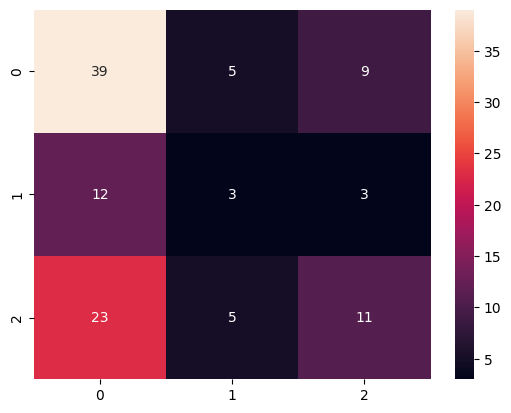

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# ...

# After training and evaluating the model

# Evaluation on validation set
predictions = []
true_labels = []

# Put model in evaluation mode
model.eval()

# Predict
for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm,annot=True)





#Classification_report

In [63]:
# Calculate classification report
report = classification_report(true_labels, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.74      0.61        53
           1       0.23      0.17      0.19        18
           2       0.48      0.28      0.35        39

    accuracy                           0.48       110
   macro avg       0.41      0.39      0.39       110
weighted avg       0.46      0.48      0.45       110

